In [2]:
import numpy as np
import pandas as pd
import glob
def check(dataList):
    for i in range(1, dataList.shape[0]):
        if dataList[i,1]-dataList[i-1,1] != 30:
            print('---------------------------')
            print(str(i-1)+str(dataList[i-1]))
            print(str(i)+str(dataList[i]))
            print(dataList[i,1]-dataList[i-1,1])
path = 'data/*.csv'
Data = []
for fname in glob.glob(path):
    Data.append(np.genfromtxt(fname, delimiter=','))
def fix(dataList):
    for i in range(1, dataList.shape[0]):
        dataList[i,1] = dataList[i-1,1] + 30

In [3]:
data_set = Data[0]
for i in range(1,len(Data)):
    data_set = np.append(data_set, Data[i], axis=0)

In [4]:
data_Final =np.sort(data_set,axis = 0)
check(data_Final)
fix(data_Final)
print("fixed")
check(data_Final)

---------------------------
37904[1229899. 1137150.]
37905[1229931. 1137182.]
32.0
---------------------------
42904[1392908. 1287152.]
42905[1392940. 1287184.]
32.0
---------------------------
47904[1561769. 1437154.]
47905[1561801. 1437188.]
34.0
---------------------------
52904[1731733. 1587158.]
52905[1731764. 1587190.]
32.0
---------------------------
57904[1903311. 1737160.]
57905[1903342. 1737196.]
36.0
---------------------------
62904[2071042. 1887166.]
62905[2071074. 1887204.]
38.0
fixed


In [5]:
data_Final[-1]

array([10874166., 10257510.])

In [6]:
def merge(my_data, scale = 10000):
    d = []
    n = 0
    index = 0
    for i in range(my_data.shape[0]):
        if (my_data[i,0] / 10000) > (index+1):
            d.append([index*scale, my_data[i,1]-n])
            n = my_data[i,1]
            index += 1
        if my_data[i,0] > 10870000:            
            break
    data = np.array(d)    
    return data

In [7]:
d = merge(data_Final)

10253550.0


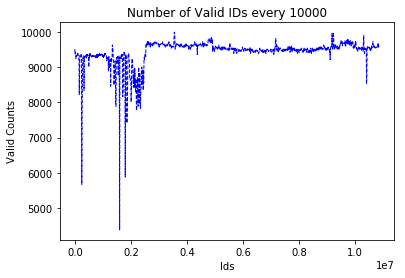

In [10]:
import matplotlib.pyplot as plt
x = d[:,0]
y = d[:,1]
plt.plot(x,y,"b--",linewidth=1)
plt.xlabel("Ids")
plt.ylabel("Valid Counts")
plt.title("Number of Valid IDs every 10000")
plt.show()